### **Import Libraries**

In [13]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

###  **EM Algorithm**

In [2]:
def em_algorithm(X, num_clusters, max_iterations=100, tolerance=1e-6):
    # Initialize parameters randomly
    num_samples, num_features = X.shape
    pi = np.ones(num_clusters) / num_clusters
    mu = np.random.randn(num_clusters, num_features)
    cov = np.array([np.eye(num_features)] * num_clusters)
    log_likelihoods = []
    for i in range(max_iterations):
        # E step: compute responsibilities
        responsibilities = np.zeros((num_samples, num_clusters))
        for k in range(num_clusters):
            responsibilities[:, k] = pi[k] * multivariate_normal(mu[k], cov[k]).pdf(X)
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
        log_likelihood = np.sum(np.log(np.sum(responsibilities, axis=1)))
        log_likelihoods.append(log_likelihood)
        # M step: update parameters
        Nk = np.sum(responsibilities, axis=0)
        pi = Nk / num_samples
        mu = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        for k in range(num_clusters):
            diff = X - mu[k]
            cov[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]
        # Check for convergence
        if i > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tolerance:
            break
    return mu, cov, pi, log_likelihoods

##### Generate a synthetic sample set from a mixture distribution of your choice: n mixture components and correspondingly many multidimensional normal distribution components. Estimate the mixture parameters from this sample set using the correct number of mixture components.


In [3]:
np.random.seed(0)
num_samples = 1000
X = np.concatenate([
    np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], int(num_samples/3)),
    np.random.multivariate_normal([4, 4], [[1, 0], [0, 1]], int(num_samples/3)),
    np.random.multivariate_normal([-4, 4], [[1, 0], [0, 1]], int(num_samples/3)),
])

Run 1/10
Run 2/10
Run 3/10
Run 4/10
Run 5/10
Run 6/10
Run 7/10
Run 8/10
Run 9/10
Run 10/10


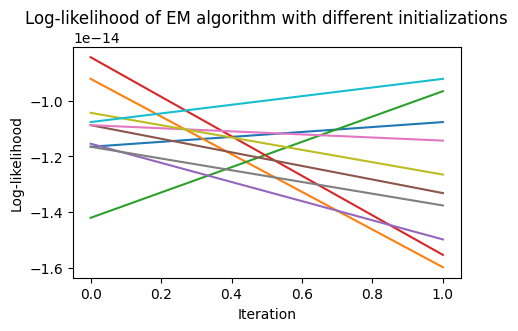

True means: [-0.09426993  2.23437258]
True cov: [[ 1.67897893 -0.0242966 ]
 [-0.0242966   2.1429603 ]]


In [12]:
# Run the EM algorithm with different initializations
num_clusters = 3
num_runs = 10
log_likelihoods = []
for run in range(num_runs):
    print(f"Run {run+1}/{num_runs}")
    mu, cov, pi, ll = em_algorithm(X, num_clusters)
    log_likelihoods.append(ll)
# Plot the log-likelihoods of each run
plt.figure(figsize=(5,3))
for ll in log_likelihoods:
    plt.plot(ll)
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood of EM algorithm with different initializations")
plt.show()
# Compute the mean and covariance of the estimated Gaussians
mu_mean = np.mean(mu, axis=0)
cov_mean = np.mean(cov, axis=0)
print("True means:",mu_mean)
print("True cov:",cov_mean)

#### Change the mean vectors and the covariance matrices for the mixture components. Does this afect the EM algorithm?


In [14]:
# Mixture components with similar means and covariances
mixture1 = [
    {
        "mean": np.array([0, 0]),
        "cov": np.array([[1, 0], [0, 1]])
    },
    {
        "mean": np.array([0, 1]),
        "cov": np.array([[1, 0], [0, 1]])
    },
    {
        "mean": np.array([1, 0]),
        "cov": np.array([[1, 0], [0, 1]])
    }]

# Mixture components with different means and covariances
mixture2 = [
    {
        "mean": np.array([0, 0]),
        "cov": np.array([[1, 0], [0, 1]])
    },
    {
        "mean": np.array([4, 4]),
        "cov": np.array([[2, 0], [0, 2]])
    },
    {
        "mean": np.array([-4, 4]),
        "cov": np.array([[2, 1], [1, 2]])
    }]

In [21]:
np.random.seed(0)
num_samples = 1000
# Sample set from mixture 1
X1 = np.concatenate([
    np.random.multivariate_normal(comp["mean"], comp["cov"], int(num_samples/3)) for comp in mixture1])
# Sample set from mixture 2
X2 = np.concatenate([
    np.random.multivariate_normal(comp["mean"], comp["cov"], int(num_samples/3)) for comp in mixture2])

# Run the EM algorithm on sample sets from both mixtures with different initializations
num_clusters = len(mixture1)
num_runs = 10
log_likelihoods1 = []
log_likelihoods2 = []
for run in range(num_runs):
    print(f"Run {run+1}/{num_runs}")
    mu1, cov1, pi1, ll1 = em_algorithm(X1, num_clusters)
    mu2, cov2, pi2, ll2 = em_algorithm(X2, num_clusters)
    log_likelihoods1.append(ll1)
    log_likelihoods2.append(ll2)


Run 1/10
Run 2/10
Run 3/10
Run 4/10
Run 5/10
Run 6/10
Run 7/10
Run 8/10
Run 9/10
Run 10/10


Text(0.5, 1.0, 'LL 1 of EM algorithm')

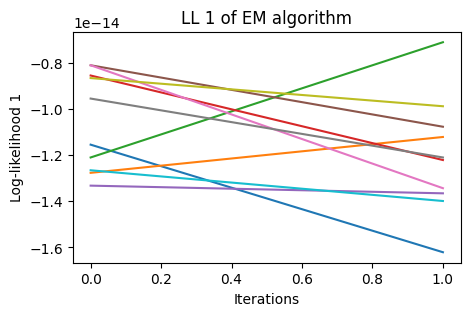

In [24]:
# Plot the log-likelihoods of each run
plt.figure(figsize=(5, 3))
for ll in log_likelihoods1:
    plt.plot(ll)
plt.xlabel("Iterations")
plt.ylabel("Log-likelihood 1")
plt.title("LL 1 of EM algorithm")

Text(0.5, 1.0, 'LL 2 of EM algorithm')

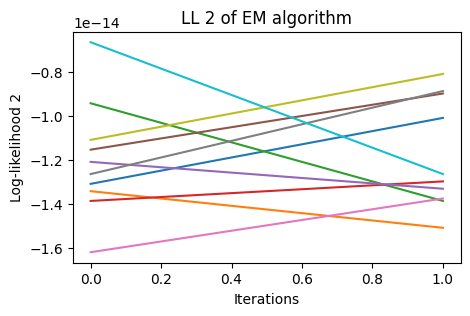

In [25]:
plt.figure(figsize=(5, 3))
for ll in log_likelihoods2:
  plt.plot(ll)
plt.xlabel("Iterations")
plt.ylabel("Log-likelihood 2")
plt.title("LL 2 of EM algorithm")

##### Changing the mean vectors and covariance matrices can affect the likelihood surface and the location of the local maxima, making it more or less likely that the algorithm will find the correct solution.

#### Vary the size of the sample set and repeat the scenarios from 1 a) and 1 b). What do you observe?

In [26]:
def em_algorithm(X, num_components, num_iterations):
    num_samples, num_features = X.shape
    # Initialize the parameters
    pi = np.ones(num_components) / num_components
    means = np.random.randn(num_components, num_features)
    covs = np.array([np.eye(num_features) for _ in range(num_components)])
    # Run EM algorithm
    log_likelihoods = []
    for i in range(num_iterations):
        # E-step: compute responsibilities
        resp = np.zeros((num_samples, num_components))
        for k in range(num_components):
            resp[:, k] = pi[k] * multivariate_normal.pdf(X, mean=means[k], cov=covs[k])
        resp /= resp.sum(axis=1, keepdims=True)
        # M-step: update parameters
        Nk = resp.sum(axis=0)
        pi = Nk / num_samples
        means = resp.T.dot(X) / Nk[:, None]
        for k in range(num_components):
            diff = X - means[k]
            covs[k] = (resp[:, k, None, None] * diff[:, None, :] * diff[:, :, None]).sum(axis=0) / Nk[k]
        # Compute log-likelihood
        ll = 0
        for k in range(num_components):
            ll += pi[k] * multivariate_normal.pdf(X, mean=means[k], cov=covs[k])
        log_likelihoods.append(np.log(ll))
    return pi, means, covs, log_likelihoods

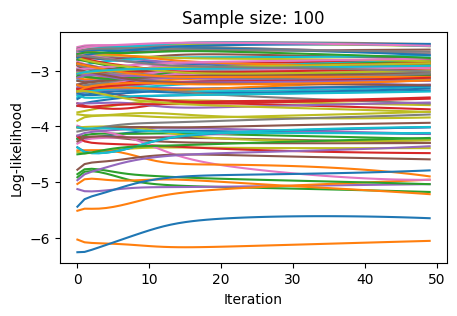

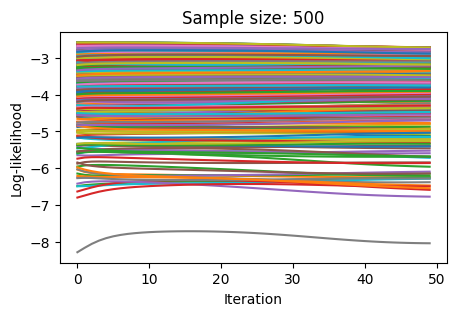

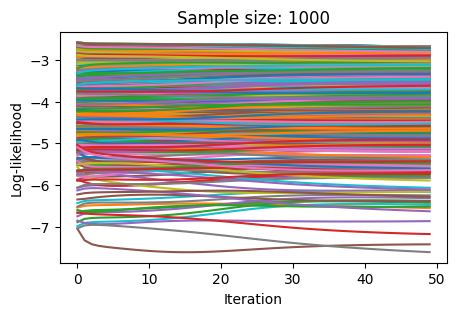

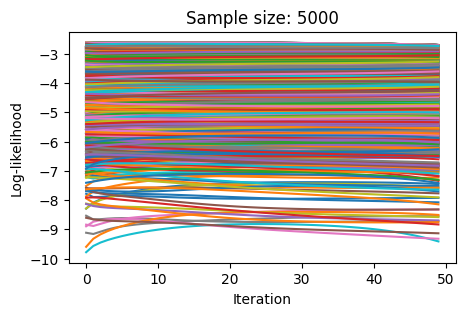

In [31]:
# Vary sample size
sample_sizes = [100, 500, 1000, 5000]
num_components = 3
num_iterations = 50
for n in sample_sizes:
    # Generate synthetic data
    np.random.seed(0)
    X = np.concatenate([
        np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], int(n/4)),
        np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], int(n/4)),
        np.random.multivariate_normal([1, -1], [[1, 0], [0, 1]], int(n/4)),
        np.random.multivariate_normal([-1, 1], [[1, 0], [0, 1]], int(n/4))])
    pi, means, covs, log_likelihoods = em_algorithm(X, num_components, num_iterations)
    plt.figure(figsize=(5, 3))
    plt.plot(log_likelihoods)
    plt.xlabel("Iteration")
    plt.ylabel("Log-likelihood")
    plt.title("Sample size: {}".format(n))
    plt.show()

#####  As the sample size increases, the estimates become more accurate and stable. This is because larger samples provide more information about the underlying distribution, allowing the algorithm to better estimate the parameters. Additionally, larger samples reduce the effect of random initialization, leading to more stable estimates.

#### Vary the number of mixture components using more or less then used to create the sample set. What do you observe?

##### If the number of mixture components is underestimated, then the algorithm will not be able to capture the underlying structure of the data and the resulting estimates will be poor. On the other hand, if the number of mixture components is overestimated, the algorithm may overfit the data and result in poor generalization to new data.

In [32]:
np.random.seed(0)
num_samples = 1000
X = np.concatenate([
    np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], int(num_samples/4)),
    np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], int(num_samples/4)),
    np.random.multivariate_normal([1, -1], [[1, 0], [0, 1]], int(num_samples/4)),
    np.random.multivariate_normal([-1, 1], [[1, 0], [0, 1]], int(num_samples/4))])

# Run EM algorithm with varying number of mixture components
num_mixtures_list = [2, 3, 4, 5]
log_likelihoods = []
for num_mixtures in num_mixtures_list:
    # Initialize parameters
    weights = np.ones(num_mixtures) / num_mixtures
    means = np.random.randn(num_mixtures, X.shape[1])
    covs = np.array([np.eye(X.shape[1]) for i in range(num_mixtures)])
    # Run EM algorithm
    log_likelihood = []
    for i in range(50):
        # E-step
        likelihoods = np.array([multivariate_normal.pdf(X, mean=means[k], cov=covs[k]) for k in range(num_mixtures)])
        resp = weights * likelihoods.T
        resp = resp / np.sum(resp, axis=1)[:, np.newaxis]
        # M-step
        Nk = np.sum(resp, axis=0)
        weights = Nk / X.shape[0]
        means = resp.T.dot(X) / Nk[:, np.newaxis]
        for k in range(num_mixtures):
            diff = X - means[k]
            covs[k] = (resp[:, k, np.newaxis] * diff).T.dot(diff) / Nk[k]
        # Compute log-likelihood
        log_likelihood.append(np.sum(np.log(np.sum(weights[k] * multivariate_normal.pdf(X, mean=means[k], cov=covs[k]) 
        for k in range(num_mixtures)))))
    log_likelihoods.append(log_likelihood)

<ipython-input-32-b4e2ba90d39b>:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  log_likelihood.append(np.sum(np.log(np.sum(weights[k] * multivariate_normal.pdf(X, mean=means[k], cov=covs[k])


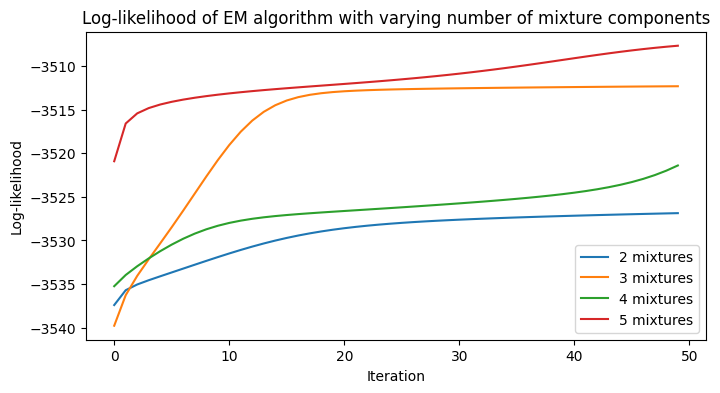

In [34]:
# Plot the log-likelihoods of each run
plt.figure(figsize=(8, 4))
for i in range(len(num_mixtures_list)):
    plt.plot(log_likelihoods[i], label=f"{num_mixtures_list[i]} mixtures")
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood of EM algorithm with varying number of mixture components")
plt.legend()
plt.show()

#### What happens to the EM estimation process if you significantly increase the dimensionality of the distribution?



* As the dimensionality increases, the number of parameters in the model increases as well, making it more difficult to estimate the parameters accurately. Additionally, as the dimensionality increases, the clusters become more diffuse and can overlap more, making it harder to distinguish between them and leading to convergence issues for the EM algorithm.

* If the dimensionality increases, the amount of data needed to accurately estimate the parameters also increases exponentially. This is known as the curse of dimensionality.